# CNN Model Training - Hand Gesture Recognition

**Student Project - Intro to AI**

This notebook trains a Convolutional Neural Network (CNN) to recognize hand gestures.

## 1. Import Libraries

In [15]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
import pickle
import os
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

## 2. Load Preprocessed Data

Load the data we prepared in the preprocessing notebook.

In [16]:
print("Loading data...")
X_train = np.load('../data/processed/X_train.npy')
X_test = np.load('../data/processed/X_test.npy')
y_train = np.load('../data/processed/y_train.npy')
y_test = np.load('../data/processed/y_test.npy')

# Load gesture names
with open('../data/processed/label_encoder.pkl', 'rb') as f:
    label_encoder = pickle.load(f)

print(f"Training samples: {len(X_train)}")
print(f"Test samples: {len(X_test)}")
print(f"Gestures: {list(label_encoder.classes_)}")

Loading data...
Training samples: 14400
Test samples: 3600
Gestures: ['fist', 'open_palm', 'peace_sign', 'pointing_finger', 'thumbs_up']


## 3. Convert Labels to One-Hot Encoding

Neural networks need labels in one-hot format:
- 0 → [1,0,0,0,0]
- 1 → [0,1,0,0,0]
- etc.

In [17]:
num_classes = 5
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

print(f"Label shape: {y_train.shape}")
print(f"Example label: {y_train[0]}")

Label shape: (14400, 5)
Example label: [0. 0. 1. 0. 0.]


## 4. Build CNN Model

Build a simple CNN with 3 convolutional layers and 2 dense layers.

In [18]:
print("\nBuilding CNN model...")
model = keras.Sequential([
    # First layer: Find basic patterns in images (edges, corners)
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 1)),
    layers.MaxPooling2D((2, 2)),  # Make image smaller
    layers.Dropout(0.25),  # Prevent overfitting
    
    # Second layer: Find more complex patterns
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.25),
    
    # Third layer: Find even more complex patterns
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.25),
    
    # Flatten the image into a 1D array
    layers.Flatten(),
    
    # Fully connected layers for classification
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    
    # Output layer: 5 neurons for 5 gestures
    layers.Dense(num_classes, activation='softmax')
])

# Show model structure
model.summary()


Building CNN model...


/Users/arham/Documents/Projects/GestureFlow/.venv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 62, 62, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 31, 31, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 31, 31, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 29, 29, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 12, 12, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 6, 6, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 6, 6, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 4608)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 256)            │     1,179,904 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 5)              │           645 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,306,117 (4.98 MB)

 Trainable params: 1,306,117 (4.98 MB)

 Non-trainable params: 0 (0.00 B)

## 5. Compile Model

Configure the learning process.

In [19]:
print("\nCompiling model...")
model.compile(
    optimizer='adam',  # Popular optimizer
    loss='categorical_crossentropy',  # Standard for classification
    metrics=['accuracy']
)

print("Model compiled successfully!")


Compiling model...
Model compiled successfully!


## 6. Setup Early Stopping

Stop training if validation loss doesn't improve for 10 epochs.

In [20]:
# Stop training early if not improving (saves time)
early_stop = EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True
)

print("Early stopping configured")

Early stopping configured


## 7. Train the Model

This will take about 5 minutes.

In [21]:
print("\nTraining model...")
history = model.fit(
    X_train, y_train,
    epochs=50,  # Maximum number of times to see the data
    batch_size=32,  # Process 32 images at a time
    validation_split=0.2,  # Use 20% of training data for validation
    callbacks=[early_stop],
    verbose=1
)


Training model...
Epoch 1/50
360/360 ━━━━━━━━━━━━━━━━━━━━ 10s 26ms/step - accuracy: 0.5541 - loss: 0.9775 - val_accuracy: 0.9774 - val_loss: 0.0877
Epoch 2/50
360/360 ━━━━━━━━━━━━━━━━━━━━ 9s 25ms/step - accuracy: 0.9555 - loss: 0.1396 - val_accuracy: 0.9917 - val_loss: 0.0362
Epoch 3/50
360/360 ━━━━━━━━━━━━━━━━━━━━ 9s 25ms/step - accuracy: 0.9777 - loss: 0.0744 - val_accuracy: 0.9958 - val_loss: 0.0175
Epoch 4/50
360/360 ━━━━━━━━━━━━━━━━━━━━ 9s 25ms/step - accuracy: 0.9849 - loss: 0.0549 - val_accuracy: 0.9948 - val_loss: 0.0229
Epoch 5/50
360/360 ━━━━━━━━━━━━━━━━━━━━ 9s 25ms/step - accuracy: 0.9878 - loss: 0.0423 - val_accuracy: 0.9965 - val_loss: 0.0121
Epoch 6/50
360/360 ━━━━━━━━━━━━━━━━━━━━ 9s 25ms/step - accuracy: 0.9888 - loss: 0.0381 - val_accuracy: 0.9972 - val_loss: 0.0154
Epoch 7/50
360/360 ━━━━━━━━━━━━━━━━━━━━ 9s 25ms/step - accuracy: 0.9888 - loss: 0.0361 - val_accuracy: 0.9969 - val_loss: 0.0088
Epoch 8/50
360/360 ━━━━━━━━━━━━━━━━━━━━ 9s 25ms/step - accuracy: 0.9917 - los

## 8. Evaluate on Test Set

See how well the model performs on unseen data.

In [22]:
print("\nEvaluating model...")
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"\nTest Accuracy: {test_accuracy*100:.2f}%")
print(f"Test Loss: {test_loss:.4f}")


Evaluating model...
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9986 - loss: 0.0038

Test Accuracy: 99.86%
Test Loss: 0.0038


## 9. Save the Model

In [23]:
print("\nSaving model...")
os.makedirs('../models', exist_ok=True)
model.save('../models/gesture_model.h5')
print("Model saved to models/gesture_model.h5")


Saving model...
Model saved to models/gesture_model.h5


## 10. Visualize Training History

Training history saved to models/training_history.png


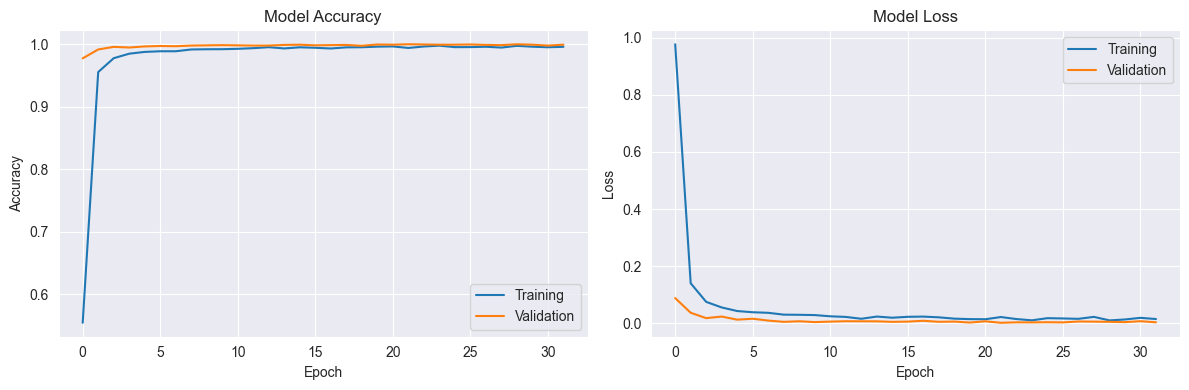

In [24]:
# Plot training history
plt.figure(figsize=(12, 4))

# Plot accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training')
plt.plot(history.history['val_accuracy'], label='Validation')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training')
plt.plot(history.history['val_loss'], label='Validation')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.savefig('../models/training_history.png')
print("Training history saved to models/training_history.png")
plt.show()

## 11. Make Predictions

In [25]:
# Make predictions on test set
predictions = model.predict(X_test)
predicted_classes = np.argmax(predictions, axis=1)
true_classes = np.argmax(y_test, axis=1)

print(f"Predicted {len(predicted_classes)} samples")

113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step
Predicted 3600 samples


## 12. Classification Report

In [26]:
# Print classification report
print("\nClassification Report:")
print(classification_report(true_classes, predicted_classes,
                          target_names=label_encoder.classes_))


Classification Report:
                 precision    recall  f1-score   support

           fist       1.00      1.00      1.00       720
      open_palm       1.00      1.00      1.00       720
     peace_sign       1.00      1.00      1.00       720
pointing_finger       1.00      1.00      1.00       720
      thumbs_up       1.00      1.00      1.00       720

       accuracy                           1.00      3600
      macro avg       1.00      1.00      1.00      3600
   weighted avg       1.00      1.00      1.00      3600



## 13. Confusion Matrix

Confusion matrix saved to models/confusion_matrix.png


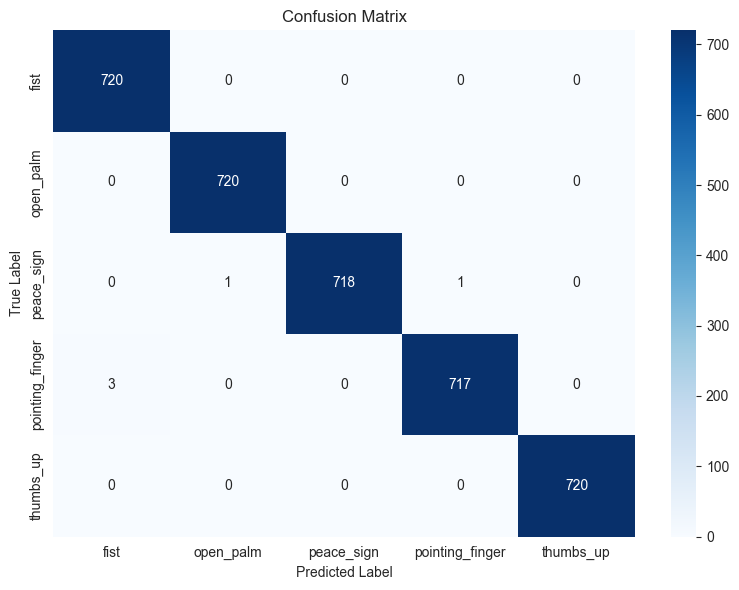

In [27]:
# Calculate confusion matrix
cm = confusion_matrix(true_classes, predicted_classes)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=label_encoder.classes_,
            yticklabels=label_encoder.classes_)
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.tight_layout()
plt.savefig('../models/confusion_matrix.png')
print("Confusion matrix saved to models/confusion_matrix.png")
plt.show()

## 14. Summary

In [28]:
print("\n" + "="*60)
print("TRAINING COMPLETE!")
print("="*60)
print(f"\nFinal Test Accuracy: {test_accuracy*100:.2f}%")
print("\nModel saved to: models/gesture_model.h5")
print("Visualizations saved to: models/")
print("\nNext step: Open predict_live.ipynb for real-time predictions!")
print("="*60)


TRAINING COMPLETE!

Final Test Accuracy: 99.86%

Model saved to: models/gesture_model.h5
Visualizations saved to: models/

Next step: Open predict_live.ipynb for real-time predictions!
